In [1]:
#|default_exp compute_diffusion_curvature_of_battery
from diffusion_curvature.graphs import *
from diffusion_curvature.datasets import *
from diffusion_curvature.core import *
from fastcore.all import *
import numpy as np
from nbdev import show_doc
%load_ext autoreload
%autoreload 2

# 3a1 Computing the diffusion curvature of the battery

In [2]:
name = "t32nodecayVNEts"

In [3]:
import graphtools
# from diffusion_curvature.graphtools import DiffusionCurvature
from diffusion_curvature.core_jax import DiffusionCurvature
def diffusion_curvature_of_pt_graphtools(u):
    X = u[0]
    dim = u[1]
    G = graphtools.Graph(X, anisotropy=1, knn=15)
    DC = DiffusionCurvature(t=15)
    G = DC.curvature(G, dimension=dim)
    return G.ks[0]
def diffusion_curvature_of_pt(X, dim):
    G = graphtools.Graph(X, anisotropy=1, knn=15, decay=None).to_pygsp()
    DC = DiffusionCurvature(
        laziness_method="Entropic",
        flattening_method="Fixed",
        comparison_method="Subtraction",
        points_per_cluster=None, # construct separate comparison spaces around each point
        comparison_space_size_factor=1
    )
    ks = DC.curvature(G, t=None, dim=dim, knn=15, idx=0)
    return ks


In [4]:
# load curvature battery
import deepdish
battery_file = "/home/piriac/data/diffusion_curvature/Curvature_Colosseum_dikey.h5"
CC = deepdish.io.load(battery_file)

In [5]:
#|export
from tqdm.auto import tqdm, trange
from fastcore.all import *
# from fastprogress.fastprogress import master_bar, progress_bar
# Iterate through the battery and compute the diffusion curvature
# store it in a new dictionary
def compute_curvature_on_battery(
        curvature_function, # fn that, given X and dim, returns the curvature of the first point
        CC, # the battery dictionary
        ):
    computed_curvature = {}
    for d in tqdm(CC['dims'], desc="intrinsic dimensions"):
        computed_curvature[d] = {}
        for c in tqdm(CC[d]['codims'], leave=False, desc='codimensions'):
            computed_curvature[d][c] = {}
            for noise_level in tqdm(CC[d][c]['noise_levels'], leave=False, desc="Noise Levels"):
                computed_curvature[d][c][noise_level] = {}
                computed_curvature[d][c][noise_level]['k'] = []
                # apply curvature function in parallel
                # us = [(CC[d][c][noise_level]['Xs'][i], d) for i in range(len(CC[d][c][noise_level]['Xs']))]
                # ks = parallel(curvature_function, us, n_workers=25)
                # computed_curvature[d][c][noise_level]['k'] = ks
                for i in trange(len(CC[d][c][noise_level]['Xs']), leave=False, desc="Samples"):
                    X = CC[d][c][noise_level]['Xs'][i]
                    k = curvature_function(X, d)
                    computed_curvature[d][c][noise_level]['k'].append(k)
    return computed_curvature

In [6]:
computed_diffusion_curvatures = compute_curvature_on_battery(diffusion_curvature_of_pt, CC)

intrinsic dimensions:   0%|          | 0/4 [00:00<?, ?it/s]

codimensions:   0%|          | 0/4 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

codimensions:   0%|          | 0/4 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

codimensions:   0%|          | 0/4 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

codimensions:   0%|          | 0/4 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

Samples:   0%|          | 0/50 [00:00<?, ?it/s]

In [7]:
#|export
# compute the pearson correlations between the computed curvature and the true curvature
from scipy.stats import pearsonr
def compute_correlations(
        computed_curvature, # the computed curvature
        CC, # the battery dictionary
        ):
    correlations = {}
    for d in tqdm(CC['dims'], desc="intrinsic dimensions"):
        correlations[d] = {}
        for c in tqdm(CC[d]['codims'], leave=False, desc='codimensions'):
            correlations[d][c] = {}
            for noise_level in tqdm(CC[d][c]['noise_levels'], leave=False, desc="Noise Levels"):
                correlations[d][c][noise_level] = {}
                correlations[d][c][noise_level]['r'] = []
                correlations[d][c][noise_level]['p'] = []
                # for i in trange(len(CC[d][c][noise_level]['Xs']), leave=False, desc="Samples"):
                k = computed_curvature[d][c][noise_level]['k']
                k_true = CC[d][c][noise_level]['k']
                r, p = pearsonr(k, k_true)
                correlations[d][c][noise_level]['r'] = r
                correlations[d][c][noise_level]['p'] = p
    return correlations

In [8]:
dc_curvature_correlations = compute_correlations(computed_diffusion_curvatures, CC)

intrinsic dimensions:   0%|          | 0/4 [00:00<?, ?it/s]

codimensions:   0%|          | 0/4 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

codimensions:   0%|          | 0/4 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

codimensions:   0%|          | 0/4 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

codimensions:   0%|          | 0/4 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

Noise Levels:   0%|          | 0/6 [00:00<?, ?it/s]

In [9]:
#|export
# Make a latex table of the correlations, both r and p values, with dimension in the rows and noise level in the columns
from tabulate import tabulate
def result_table(
        correlations, # dictionary of correlations
        c:int, # codimension
        style = 'fancy_grid'
        ):
    noise_levels = correlations[correlations.keys().__iter__().__next__()][c].keys()
    print("Codimension = ",c)
    table = tabulate(
        [[d] + [f"{correlations[d][c][noise_level]['r']:.{3}f}/{correlations[d][c][noise_level]['p']:.{3}f}" for noise_level in noise_levels] for d in dc_curvature_correlations.keys()],
        headers=['dim'] + [f"Noise = {nl}" for nl in noise_levels],
        tablefmt=style, #latex_raw
        floatfmt=".2f",
        )
    print(table)
    return table

In [10]:
table = result_table(dc_curvature_correlations, c=1)

Codimension =  1
╒═══════╤═══════════════╤════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╕
│   dim │ Noise = 0.0   │ Noise = 0.05   │ Noise = 0.1   │ Noise = 0.2   │ Noise = 0.3   │ Noise = 0.5   │
╞═══════╪═══════════════╪════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╡
│     2 │ 0.633/0.000   │ 0.777/0.000    │ 0.440/0.001   │ 0.463/0.001   │ 0.350/0.013   │ 0.354/0.012   │
├───────┼───────────────┼────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│     3 │ 0.745/0.000   │ 0.627/0.000    │ 0.613/0.000   │ 0.452/0.001   │ 0.490/0.000   │ 0.366/0.009   │
├───────┼───────────────┼────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│     4 │ 0.598/0.000   │ 0.614/0.000    │ 0.604/0.000   │ 0.338/0.016   │ 0.398/0.004   │ 0.436/0.002   │
├───────┼───────────────┼────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│     5 │ 0.590/0.00

In [11]:
table = result_table(dc_curvature_correlations, c=2)

Codimension =  2
╒═══════╤═══════════════╤════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╕
│   dim │ Noise = 0.0   │ Noise = 0.05   │ Noise = 0.1   │ Noise = 0.2   │ Noise = 0.3   │ Noise = 0.5   │
╞═══════╪═══════════════╪════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╡
│     2 │ 0.677/0.000   │ 0.537/0.000    │ 0.491/0.000   │ 0.140/0.333   │ 0.013/0.926   │ 0.285/0.045   │
├───────┼───────────────┼────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│     3 │ 0.646/0.000   │ 0.595/0.000    │ 0.659/0.000   │ 0.456/0.001   │ 0.007/0.960   │ 0.099/0.495   │
├───────┼───────────────┼────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│     4 │ 0.501/0.000   │ 0.637/0.000    │ 0.480/0.000   │ 0.485/0.000   │ 0.411/0.003   │ 0.359/0.010   │
├───────┼───────────────┼────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│     5 │ 0.714/0.00

In [12]:
table = result_table(dc_curvature_correlations, c=3)

Codimension =  3
╒═══════╤═══════════════╤════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╕
│   dim │ Noise = 0.0   │ Noise = 0.05   │ Noise = 0.1   │ Noise = 0.2   │ Noise = 0.3   │ Noise = 0.5   │
╞═══════╪═══════════════╪════════════════╪═══════════════╪═══════════════╪═══════════════╪═══════════════╡
│     2 │ 0.673/0.000   │ 0.490/0.000    │ 0.309/0.029   │ 0.127/0.380   │ 0.348/0.013   │ 0.097/0.502   │
├───────┼───────────────┼────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│     3 │ 0.619/0.000   │ 0.445/0.001    │ 0.362/0.010   │ 0.491/0.000   │ 0.274/0.054   │ 0.157/0.277   │
├───────┼───────────────┼────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│     4 │ 0.626/0.000   │ 0.631/0.000    │ 0.534/0.000   │ 0.727/0.000   │ 0.444/0.001   │ 0.378/0.007   │
├───────┼───────────────┼────────────────┼───────────────┼───────────────┼───────────────┼───────────────┤
│     5 │ 0.564/0.00

In [13]:
table_latex = result_table(dc_curvature_correlations, c=1, style='latex_raw')
table_latex += result_table(dc_curvature_correlations, c=2, style='latex_raw')
table_latex += result_table(dc_curvature_correlations, c=3, style='latex_raw')

Codimension =  1
\begin{tabular}{rllllll}
\hline
   dim & Noise = 0.0   & Noise = 0.05   & Noise = 0.1   & Noise = 0.2   & Noise = 0.3   & Noise = 0.5   \\
\hline
     2 & 0.633/0.000   & 0.777/0.000    & 0.440/0.001   & 0.463/0.001   & 0.350/0.013   & 0.354/0.012   \\
     3 & 0.745/0.000   & 0.627/0.000    & 0.613/0.000   & 0.452/0.001   & 0.490/0.000   & 0.366/0.009   \\
     4 & 0.598/0.000   & 0.614/0.000    & 0.604/0.000   & 0.338/0.016   & 0.398/0.004   & 0.436/0.002   \\
     5 & 0.590/0.000   & 0.506/0.000    & 0.246/0.085   & 0.569/0.000   & 0.552/0.000   & 0.447/0.001   \\
\hline
\end{tabular}
Codimension =  2
\begin{tabular}{rllllll}
\hline
   dim & Noise = 0.0   & Noise = 0.05   & Noise = 0.1   & Noise = 0.2   & Noise = 0.3   & Noise = 0.5   \\
\hline
     2 & 0.677/0.000   & 0.537/0.000    & 0.491/0.000   & 0.140/0.333   & 0.013/0.926   & 0.285/0.045   \\
     3 & 0.646/0.000   & 0.595/0.000    & 0.659/0.000   & 0.456/0.001   & 0.007/0.960   & 0.099/0.495   \\
     4 & 0.

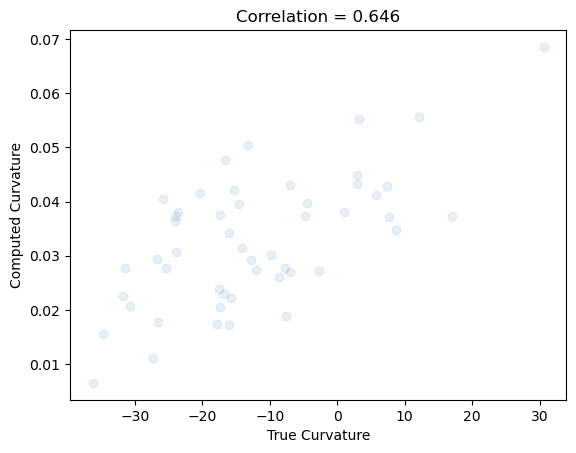

In [14]:
import matplotlib.pyplot as plt
d = 3
c = 2
noise_level = 0.0
plt.scatter(CC[d][c][noise_level]['k'], computed_diffusion_curvatures[d][c][noise_level]['k'], alpha=0.1)
plt.xlabel("True Curvature")
plt.ylabel("Computed Curvature")
plt.title(f"Correlation = {dc_curvature_correlations[d][c][noise_level]['r']:.3f}")
plt.show()

In [15]:
deepdish.io.save(f"/home/piriac/data/diffusion_curvature/computed_diffusion_curvatures_core_{name}.h5", computed_diffusion_curvatures)